<a href="https://colab.research.google.com/github/Pravallikavyas/Task-7/blob/main/Copy_of_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score 

**Importing the dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull( ).sum( )

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df=df.drop_duplicates()

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [8]:
X=df.loc[:,['Age','EstimatedSalary']].values
y=df.loc[:,'Purchased'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

**Fitting SVM to the Training set**

In [11]:
svc=SVC(random_state=7)
accuracies = cross_val_score(svc,X_train,y_train,cv=5)
svc.fit(X_train,y_train)
print("Train Score:",np.mean(accuracies))

Train Score: 0.90625


In [12]:
print("Test Score:",svc.score(X_test,y_test))

Test Score: 0.325


**Predicting the Test set results**

In [18]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}
svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [19]:
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Train Score: 0.915625
Test Score: 0.325


**Visualising the Training set results**

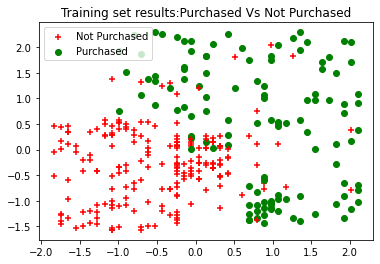

In [23]:
import pylab as pl
for i in range(0, X_train.shape[0]):
 if y_train[i] == 0:
    c1 = pl.scatter(X_train[i,0],X_train[i,1],c='r',marker='+')
 elif y_train[i] == 1:
    c2 = pl.scatter(X_train[i,0],X_train[i,1],c='g',marker='o')
pl.legend([c1,c2], ['Not Purchased', 'Purchased'])
pl.title('Training set results:Purchased Vs Not Purchased')
pl.show()